In [47]:

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [64]:
# Reading whale returns
whale_returns = Path("Instructions/Starter_Code/Resources/whale_returns.csv")
sp500_history = Path("Instructions/Starter_Code/Resources/sp500_history.csv")
goog_historical = Path("Instructions/Starter_Code/Resources/goog_historical.csv")
cost_historical = Path("Instructions/Starter_Code/Resources/cost_historical.csv")
algo_returns = Path("Instructions/Starter_Code/Resources/algo_returns.csv")
aapl_historical = Path("Instructions/Starter_Code/Resources/aapl_historical.csv")

In [65]:
# Set up read csv datasets
# goog_historical = pd.read_csv(goog_historical, index_col="Trade DATE")
# aapl_historical = pd.read_csv(aapl_historical, index_col="Trade DATE")
# algo_returns = pd.read_csv(algo_returns, index_col="Date")
# cost_historical = pd.read_csv(cost_historical, index_col="Trade DATE")
# algo_returns = pd.read_csv(algo_returns, index_col="Trade DATE")
# sp500_history = pd.read_csv(sp500_history, index_col="Date")
# whale_returns = pd.read_csv(whale_returns, index_col="Date")

goog_historical = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical = pd.read_csv(aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_historical = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
#algo_returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = pd.read_csv(sp500_history,index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [ ]:
# Set up read csv datasets
goog_historical = pd.read_csv(goog_historical, index_col="Trade DATE")
aapl_historical = pd.read_csv(aapl_historical, index_col="Trade DATE")
algo_returns = pd.read_csv(algo_returns, index_col="Date")
cost_historical = pd.read_csv(cost_historical, index_col="Trade DATE")
algo_returns = pd.read_csv(algo_returns, index_col="Trade DATE")
sp500_history = pd.read_csv(sp500_history, index_col="Date")
whale_returns = pd.read_csv(whale_returns, index_col="Date")

In [73]:
# count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [ ]:
# Drop nulls
whale_returns.dropna(inplace=True)

print(whale_returns.insull().sum())

whale_returns.head()

In [81]:
# Reading algorithmic returns
algo_returns_csv = Path("Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
algo_returns.head(10)
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [82]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [83]:
# Drop nulls
algo_returns.dropna(inplace=True)
#algo_returns.isnull().sum()  done
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [85]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
sp500_history.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [86]:
# Check Data Types
sp500_history.dtypes
sp500_history["Close"] = sp500_history["Close"].replace({'\$':''}, regex = True)
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [87]:
# Fix Data Types
# sp500_history.to_numeric
sp500_history.dtypes
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [88]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [89]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
# sp500_daily_returns.isnull().sum()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [90]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {"Close":"S&P 500"})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [91]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_algo_sp500 = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
combined_whale_algo_sp500.head()
combined_whale_algo_sp500.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

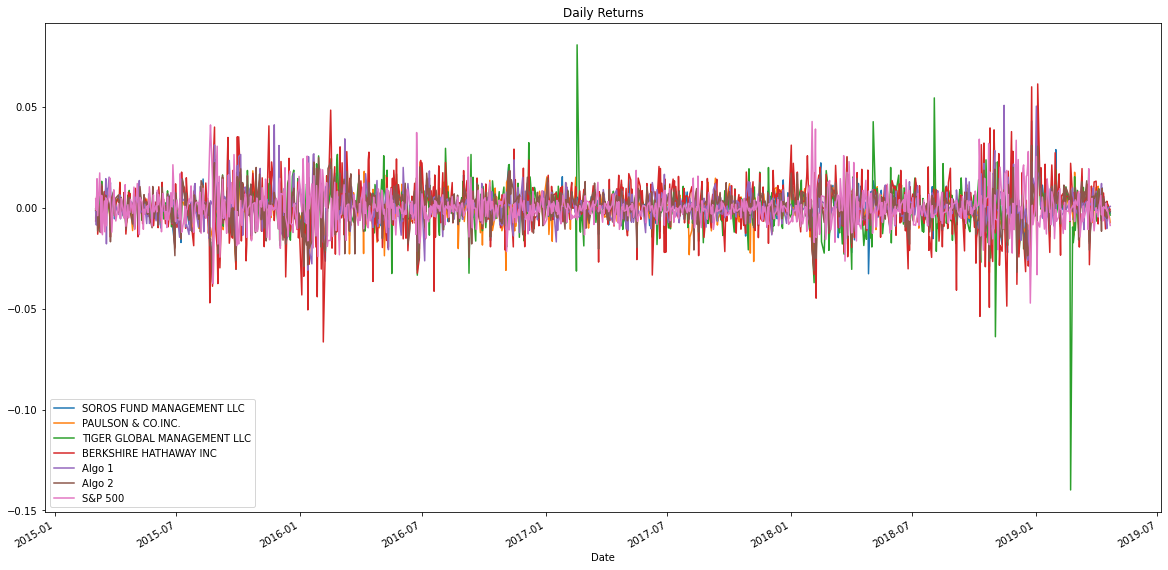

In [92]:
# Plot daily returns of all portfolios
combined_whale_algo_sp500.plot(figsize=(20,10), title = "Daily Returns")

<AxesSubplot:xlabel='Date'>

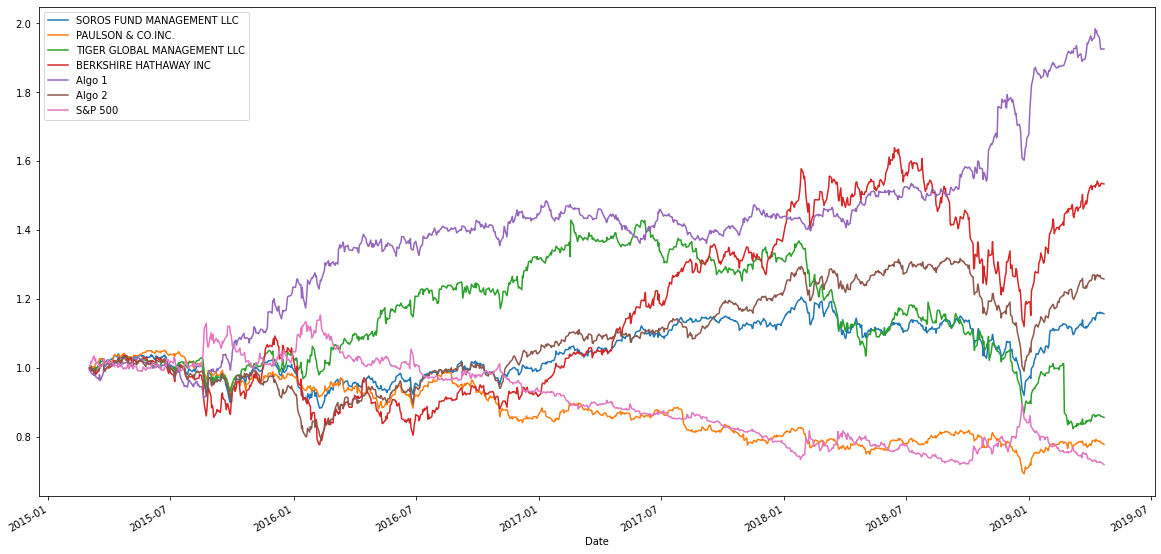

In [93]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_whale_algo_sp500).cumprod()
cumulative_returns.plot(figsize=(20,10))
# Plot cumulative returns